# 1. Check Dataset

### A. Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
import os
from os import listdir
from os.path import isfile, join

### B. Check if the .environ is working
from os.path import isfile, join

In [2]:
# We created an line in .env that is called 'image_folder' with the path of the file and print
# it in order to ceheck if it is working for us

os.environ['IMAGE_FOLDER']

'/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_cropped_sample'

### C. Build X and y 
os.environ['IMAGE_FOLDER']
#print(os.environ)

In [3]:
#We named the 'Image_folder' as 'image_dir' and like that it could be easier to call it
image_dir = os.environ['IMAGE_FOLDER']

#Created this in order to recover all our downloaded images on the IMAGE_FOLDER
image_files = []
for f in listdir(image_dir):
    print(f)
    if isfile(os.path.join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

#We considered that our input X will be the images that we downloaded and the 'y' will be
# the classification "stars or galaxy"
X_list = []
y_list = []
print(image_files)
for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    cat = image_info[3]
    image_data = np.array(Image.open(os.path.join(image_dir,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list.append(cat)

X_data = np.array(X_list)
print(X_data.shape)
y_data = np.array(y_list)
print(y_data.shape)

1237664673256571815_206.152742248973_35.7832473187171_GALAXY_1.010923.jpg
1237678597545591138_341.669732121639_2.68301678396564_STAR_1.209123.jpg
1237661971714802594_167.43558751989_7.25414879542971_GALAXY_0.6665187.jpg
1237678661426872832_6.57664509322581_4.68786591849795_STAR_2.225737.jpg
1237680272035807907_331.937003344296_19.1261163729245_STAR_0.0001422011.jpg
1237671257982959869_71.7395540497452_22.8695598593538_STAR_-8.090883E-05.jpg
1237680275799212442_6.26243031097539_26.8156110992586_STAR_2.767038.jpg
1237666301632512172_57.5976223070929_0.822063361286141_GALAXY_0.1848572.jpg
1237680275797901779_2.92129873999653_26.7423939900832_GALAXY_0.350847.jpg
1237663782598148618_25.9370141980074_-1.22368504381066_GALAXY_0.2391574.jpg
1237680246816637360_5.46604500701631_20.3671261289832_GALAXY_0.6223869.jpg
1237659154224579580_258.073424808874_23.2493670116733_STAR_-0.0003176941.jpg
1237653652374814984_7.09083700083437_15.2762710357545_GALAXY_0.2505086.jpg
1237680299419763284_338.218180

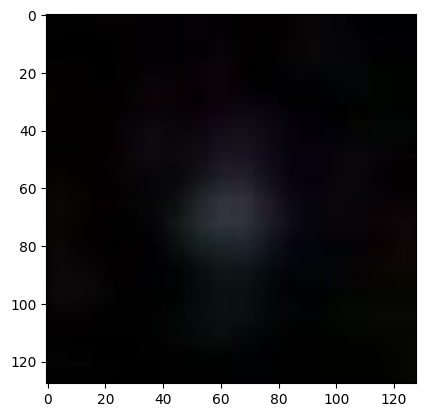

In [4]:
#Plot an image in order to check that our code was working and we had the correct images
plt.imshow(X_data[3])

In [5]:
#As the catergory star and galaxy was on a text version on the file we had to replace it
# by numbers 0 and 1.

y_data_cat = pd.Series(y_data).map({'STAR':0, 'GALAXY':1})
y_data_cat

0       1
1       0
2       1
3       0
4       0
       ..
4837    0
4838    0
4839    0
4840    1
4841    0
Length: 4842, dtype: int64

### D. Split our dataset

In [6]:
#As mentioned before, our X will be our downloaded images
X = X_data
#We will use the function we had above and name it 'y'
y = y_data_cat

#Split the dataset and add a stratify argument/parameter, which asks whether you want to
# retain the same proportion of classes in the train and test sets that are found in the
# entire original dataset. For example, if there are 100 observations in the entire original
# dataset of which 80 are class 𝑎and 20 are class 𝑏 and you set stratify = True, with a .7 : .3
# train-test split, you will get a training set with 56 examples of class 𝑎and 14 examples of
# class 𝑏.
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [7]:
#Once we split our dataset, we will check the shape and realise if our output is coherent or
# not with our dataset

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3873, 128, 128, 3), (969, 128, 128, 3), (3873,), (969,))

# 1. The Convolutional Neural Network 

We will create our first model called "model_1", this will be our departure point. 

### A. Architecture and compilation of a CNN

In [8]:
#Create our first test model
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/nataliamenacho/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       615,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 634,453 (2.42 MB)

 Trainable params: 634,453 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Compile model
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy','recall','precision','mae','mse'])


### B. Training the CNN

In [11]:
#Train the model
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5)

history_1 = model_1.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_split=0.2,
          callbacks=[es])


Epoch 1/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.6958 - loss: 1.8038 - mae: 0.4009 - mse: 0.2269 - precision: 0.6921 - recall: 0.8868 - val_accuracy: 0.5935 - val_loss: 0.6846 - val_mae: 0.4950 - val_mse: 0.2457 - val_precision: 0.5935 - val_recall: 1.0000
Epoch 2/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.5815 - loss: 0.6844 - mae: 0.4946 - mse: 0.2456 - precision: 0.5814 - recall: 1.0000 - val_accuracy: 0.5923 - val_loss: 0.6980 - val_mae: 0.4918 - val_mse: 0.2444 - val_precision: 0.5930 - val_recall: 0.9978
Epoch 3/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.6289 - loss: 0.6719 - mae: 0.4865 - mse: 0.2394 - precision: 0.6288 - recall: 1.0000 - val_accuracy: 0.5923 - val_loss: 0.6955 - val_mae: 0.4888 - val_mse: 0.2432 - val_precision: 0.5930 - val_recall: 0.9978
Epoch 4/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.6091 - loss: 0.6727 - mae: 0.4853 - mse: 0.2399 - precision: 0.6090 - recall: 1.0000 - val_accuracy:

In [12]:
#model_1.save('../models/to-infinity-beyond.model.01.keras')

### C. Evaluate model's performance

In [13]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6129 - loss: 0.6682 - mae: 0.4789 - mse: 0.2376 - precision: 0.6129 - recall: 1.0000


[0.6705291271209717,
 0.6068111658096313,
 1.0,
 0.6068111658096313,
 0.48005515336990356,
 0.2387721985578537]

### D. Plot loss and accuracy

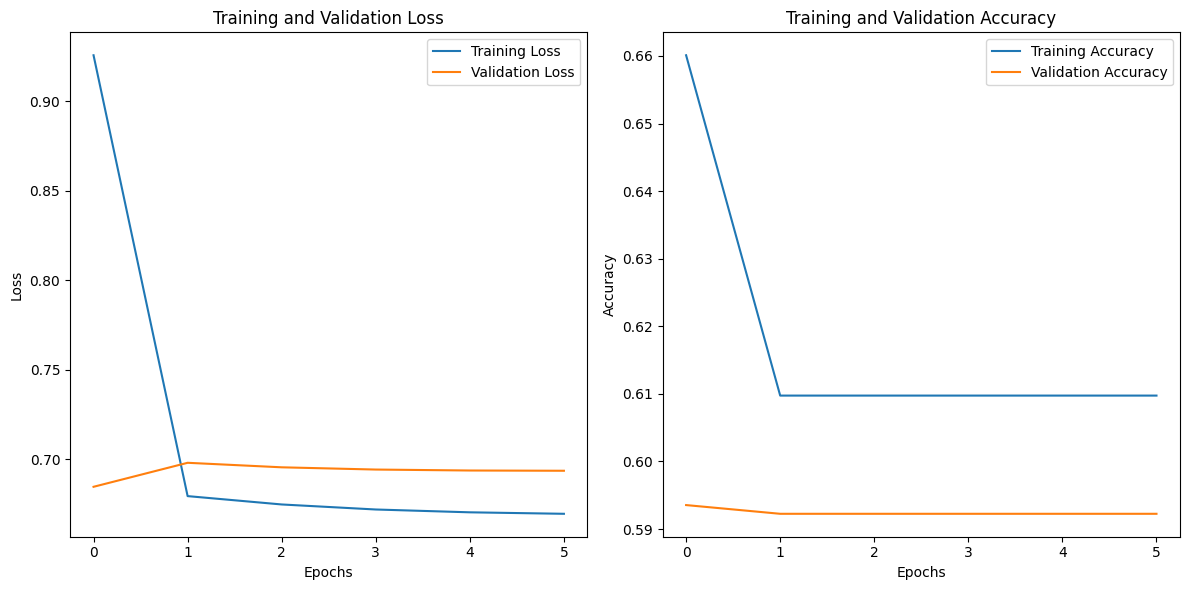

In [14]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Seems a promising model so we will keep it in order to test it against the best other.

# 2. The Convolutional Neural Network - part 2 

We will create 4 other models, and chose one between them to comparte it agains model_1.

In [15]:
# Model 2: Increase neurons in the Dense layer
model_2 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')])


# Model 3: Further increase neurons in the Dense layer
model_3 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 4: Increase number of filters in Conv2D layers
model_4 = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Model 5: Added 2 dropout.
model_5 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [16]:
# Compile the models
models = [model_2, model_3, model_4, model_5]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.
Model 3 compiled.
Model 4 compiled.


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories = []

# Train each model and store the history
for i, model in enumerate(models, start=1):
    print(f"Training Model {i}...")
    history = model.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[es])
    histories.append(history)
    print(f"Model {i} trained.")


Training Model 1...
Epoch 1/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.8370 - loss: 3.7926 - mae: 0.2038 - mse: 0.1370 - precision: 0.8590 - recall: 0.8624 - val_accuracy: 0.9032 - val_loss: 0.2845 - val_mae: 0.1931 - val_mse: 0.0856 - val_precision: 0.9551 - val_recall: 0.8783
Epoch 2/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9159 - loss: 0.3454 - mae: 0.1527 - mse: 0.0730 - precision: 0.9326 - recall: 0.9240 - val_accuracy: 0.9071 - val_loss: 0.3284 - val_mae: 0.2390 - val_mse: 0.0960 - val_precision: 0.8745 - val_recall: 0.9848
Epoch 3/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.9248 - loss: 0.2866 - mae: 0.1532 - mse: 0.0708 - precision: 0.9204 - recall: 0.9610 - val_accuracy: 0.9239 - val_loss: 0.2768 - val_mae: 0.1180 - val_mse: 0.0605 - val_precision: 0.9293 - val_recall: 0.9435
Epoch 4/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.9164 - loss: 0.2893 - mae: 0.1436 - mse: 0.0708 - precision: 0.9240 - recall: 0.

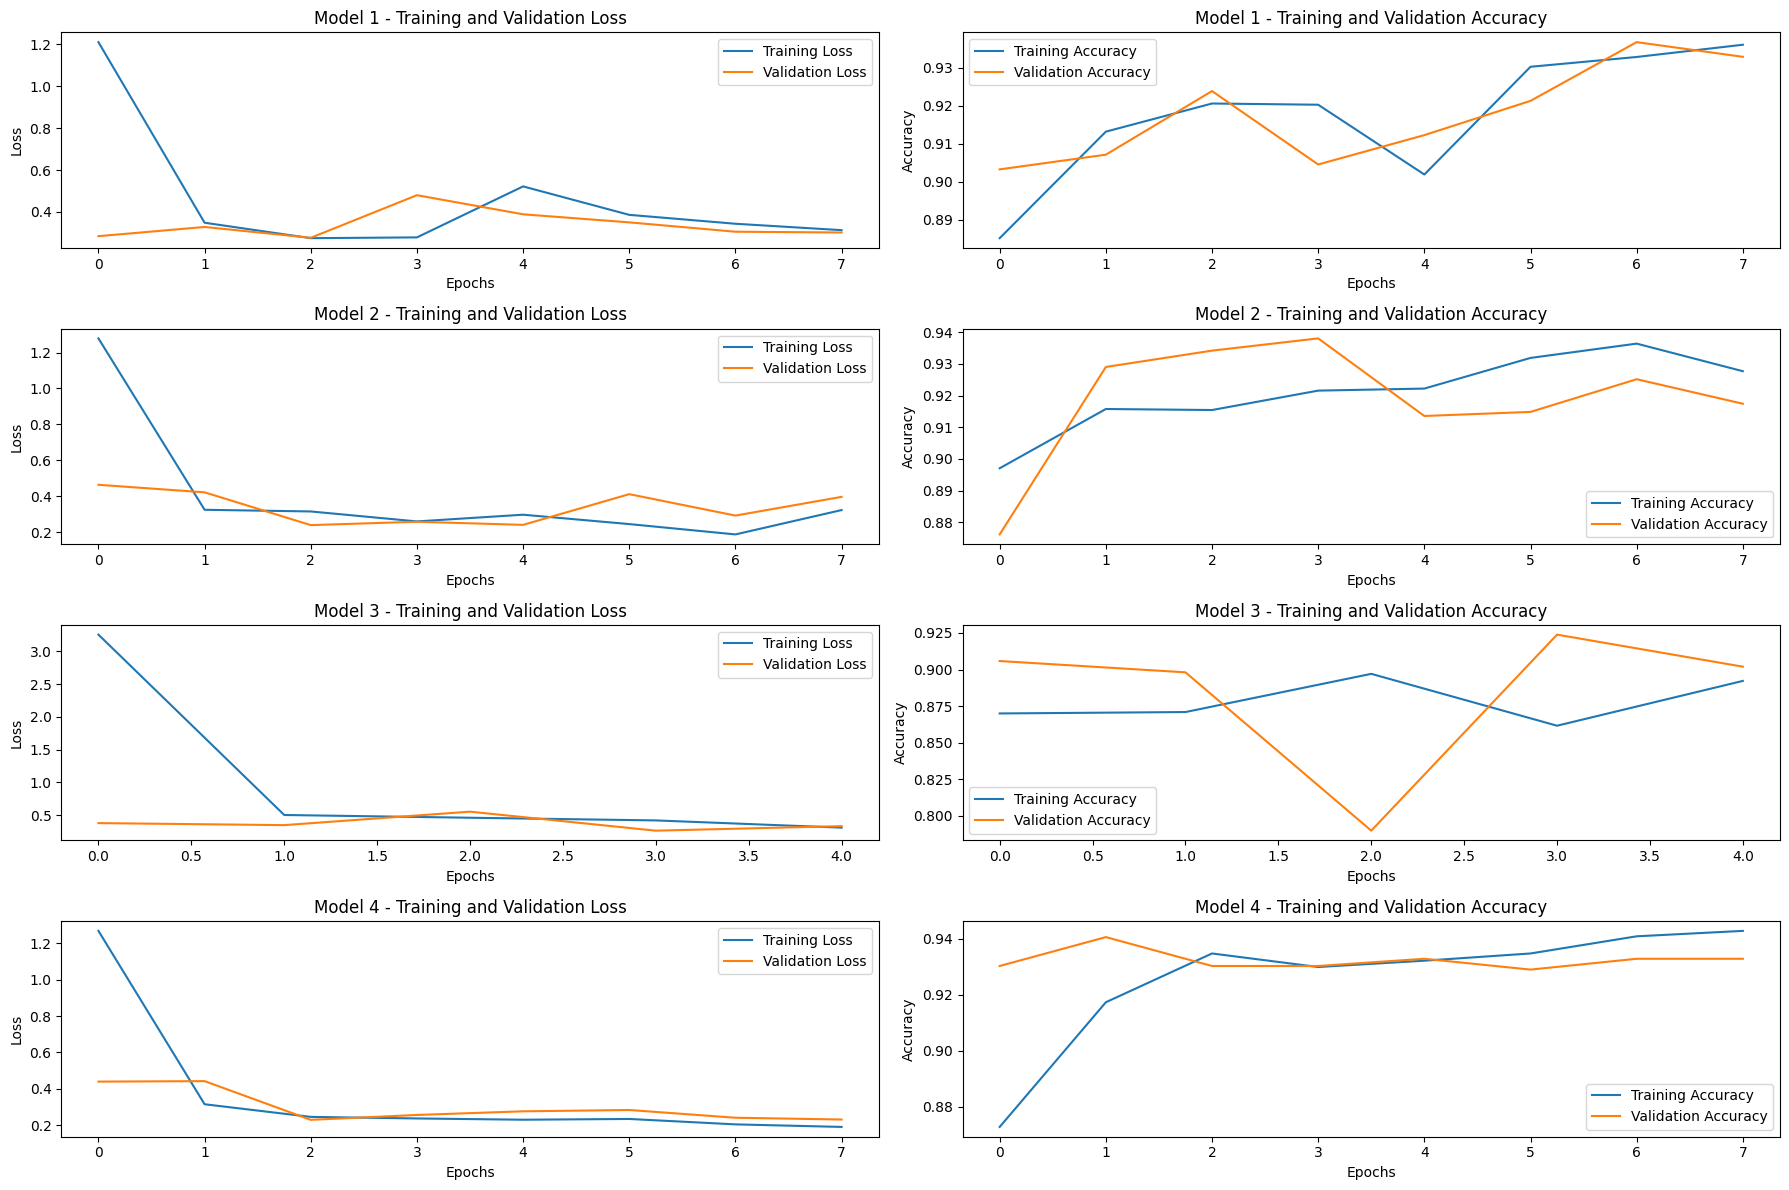

In [18]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history in enumerate(histories, start=1):
    plt.subplot(4, 2, i * 2 - 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(4, 2, i * 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} - Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

### We will take the second model plotted on the graph which looks better than all the others

In [19]:
y_train.value_counts()/len(y_train)

1    0.606248
0    0.393752
Name: count, dtype: float64

## Comparison between our "model_1" and "model_3"

### Retrieve information about images

In [20]:
import os
import shutil
import random
def generate_balanced_dataset(galaxy_dir, star_dir, galaxy_aug_dir, star_aug_dir, balanced_dir):
    # Ensure the balanced directory exists
    if not os.path.exists(balanced_dir):
        os.makedirs(balanced_dir)
    # Get the list of files in each directory
    galaxy_files = os.listdir(galaxy_dir)
    star_files = os.listdir(star_dir)
    galaxy_aug_files = os.listdir(galaxy_aug_dir)
    star_aug_files = os.listdir(star_aug_dir)
    # Count the number of images in each directory
    galaxy_count = len(galaxy_files)
    star_count = len(star_files)
    galaxy_aug_count = len(galaxy_aug_files)
    star_aug_count = len(star_aug_files)
    # Copy all original images to the balanced directory
    for file in galaxy_files:
        shutil.copy(os.path.join(galaxy_dir, file), balanced_dir)
    for file in star_files:
        shutil.copy(os.path.join(star_dir, file), balanced_dir)
    if galaxy_aug_count > star_aug_count:
        # Copy all star augmented images to the balanced directory
        for file in star_aug_files:
            shutil.copy(os.path.join(star_aug_dir, file), balanced_dir)
        # Copy star_aug_count - (galaxy_count - star_count) galaxy augmented images to the balanced directory
        additional_files = random.sample(galaxy_aug_files, star_aug_count - (galaxy_count - star_count))
        for file in additional_files:
            shutil.copy(os.path.join(galaxy_aug_dir, file), balanced_dir)
    else:
        # Copy all galaxy augmented images to the balanced directory
        for file in galaxy_aug_files:
            shutil.copy(os.path.join(galaxy_aug_dir, file), balanced_dir)
        # Copy galaxy_aug_count - (star_count - galaxy_count) star augmented images to the balanced directory
        additional_files = random.sample(star_aug_files, galaxy_aug_count - (star_count - galaxy_count))
        for file in additional_files:
            shutil.copy(os.path.join(star_aug_dir, file), balanced_dir)

In [21]:
from space_agent.interface.interface_main import create_rotated_images, copy_images_sorted

In [22]:
create_rotated_images()
copy_images_sorted()

index: 0 - rc: 0 - RAS
index: 1 - rc: 0 - RAS
index: 2 - rc: 0 - RAS
index: 3 - rc: 0 - RAS
index: 4 - rc: 0 - RAS
index: 5 - rc: 0 - RAS
index: 6 - rc: 0 - RAS
index: 7 - rc: 0 - RAS
index: 8 - rc: 0 - RAS
index: 9 - rc: 0 - RAS
index: 10 - rc: 0 - RAS
index: 11 - rc: 0 - RAS
index: 12 - rc: 0 - RAS
index: 13 - rc: 0 - RAS
index: 14 - rc: 0 - RAS
index: 15 - rc: 0 - RAS
index: 16 - rc: 0 - RAS
index: 17 - rc: 0 - RAS
index: 18 - rc: 0 - RAS
index: 19 - rc: 0 - RAS
index: 20 - rc: 0 - RAS
index: 21 - rc: 0 - RAS
index: 22 - rc: 0 - RAS
index: 23 - rc: 0 - RAS
index: 24 - rc: 0 - RAS
index: 25 - rc: 0 - RAS
index: 26 - rc: 0 - RAS
index: 27 - rc: 0 - RAS
index: 28 - rc: 0 - RAS
index: 29 - rc: 0 - RAS
index: 30 - rc: 0 - RAS
index: 31 - rc: 0 - RAS
index: 32 - rc: 0 - RAS
index: 33 - rc: 0 - RAS
index: 34 - rc: 0 - RAS
index: 35 - rc: 0 - RAS
index: 36 - rc: 0 - RAS
index: 37 - rc: 0 - RAS
index: 38 - rc: 0 - RAS
index: 39 - rc: 0 - RAS
index: 40 - rc: 0 - RAS
index: 41 - rc: 0 - RAS
in

In [29]:
image_star_dir = os.environ['IMAGES_FOLDER_SORTED_STAR']
image_galaxy_dir = os.environ['IMAGES_FOLDER_SORTED_GAL']
image_star_aug_dir = os.environ['IMAGES_FOLDER_AUGMENTED_STAR']
image_galaxy_aug_dir = os.environ['IMAGES_FOLDER_AUGMENTED_GAL']
image_bal_dir = os.environ['IMAGE_FINAL']

generate_balanced_dataset(image_galaxy_dir, image_star_dir,  image_galaxy_aug_dir, image_star_aug_dir,image_bal_dir)

Last try with 2 models (the first one and the model_3) using the augmented images

In [30]:
#Model r2d2: Further increase neurons in the Dense layer
model_r2d2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Model c3po: Further increase neurons in the Dense layer
model_c3po = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

/Users/nataliamenacho/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# Compile the models
models = [model_r2d2, model_c3po]
for i, model in enumerate(models, start=1):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'recall', 'precision', 'mae', 'mse'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.


In [32]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=5)

# Placeholder for storing histories
histories = []

# Train each model and store the history
for i, model in enumerate(models, start=1):
    print(f"Training Model {i}...")
    history = model.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[es])
    histories.append(history)
    print(f"Model {i} trained.")

Training Model 1...
Epoch 1/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.8214 - loss: 2.5646 - mae: 0.2596 - mse: 0.1700 - precision: 0.8772 - recall: 0.8264 - val_accuracy: 0.9252 - val_loss: 0.2983 - val_mae: 0.1788 - val_mse: 0.0768 - val_precision: 0.9295 - val_recall: 0.9457
Epoch 2/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9289 - loss: 0.2695 - mae: 0.1480 - mse: 0.0683 - precision: 0.9325 - recall: 0.9548 - val_accuracy: 0.9174 - val_loss: 0.3388 - val_mae: 0.1817 - val_mse: 0.0795 - val_precision: 0.9160 - val_recall: 0.9478
Epoch 3/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9278 - loss: 0.2772 - mae: 0.1453 - mse: 0.0699 - precision: 0.9211 - recall: 0.9659 - val_accuracy: 0.8826 - val_loss: 1.0726 - val_mae: 0.1617 - val_mse: 0.0946 - val_precision: 0.8951 - val_recall: 0.9087
Epoch 4/100
194/194 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9125 - loss: 0.2862 - mae: 0.1506 - mse: 0.0723 - precision: 0.9092 - recall: 0.

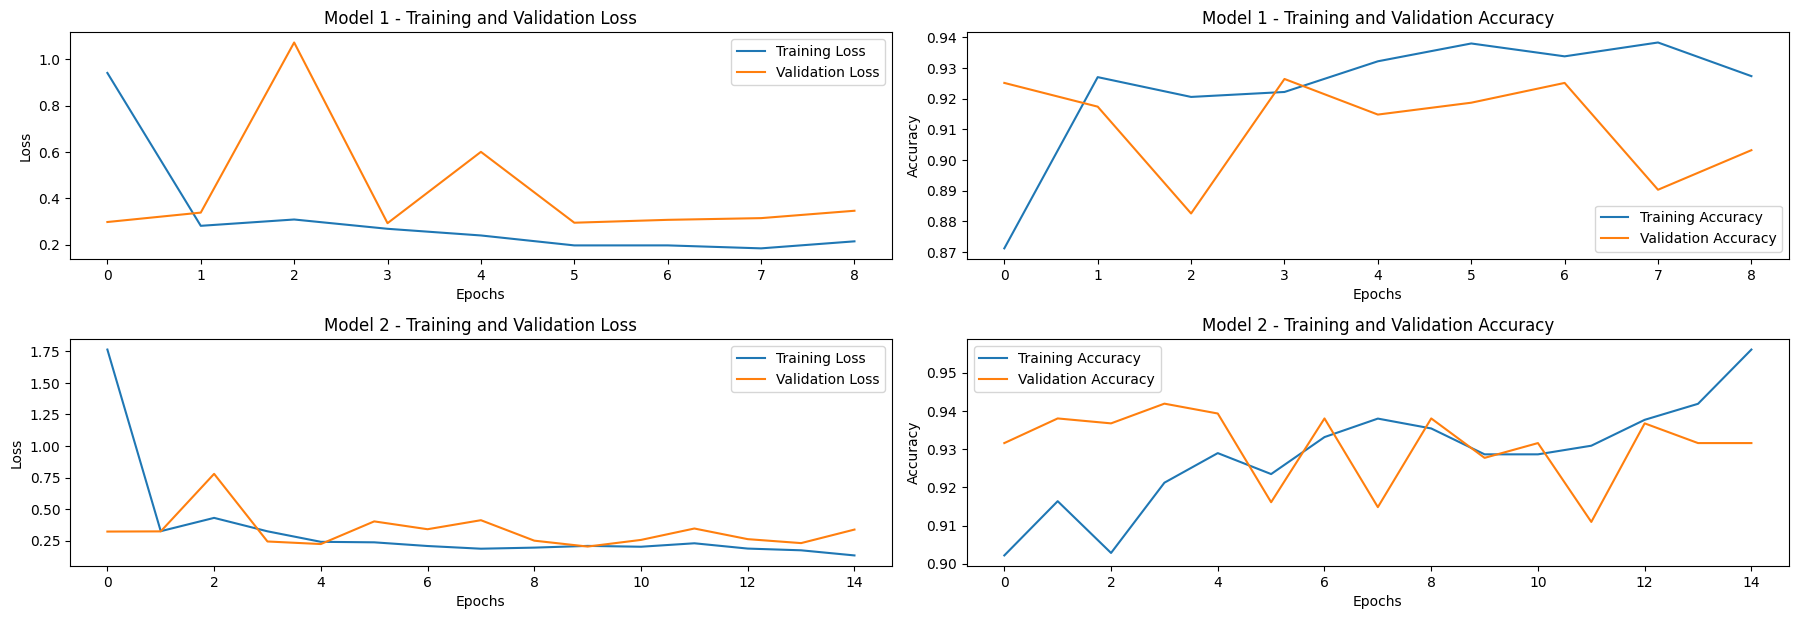

In [33]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history in enumerate(histories, start=1):
    plt.subplot(4, 2, i * 2 - 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(4, 2, i * 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Model {i} - Training and Validation Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

In [34]:
model_r2d2.save('../models/to-infinity-beyond.model.r2d2.keras')

# CNN REDSHIFT

For the redshift model, we created a new folder... called 'IMAGE_FINAL' which will 

In [35]:
os.environ['IMAGE_FINAL']

'/Users/nataliamenacho/code/NMenacho/to_infinity_and_beyond/To-infinity-and-beyond/data/images_final'

In [89]:
image_dir = os.environ['IMAGE_FINAL']


image_files = []
for f in listdir(image_dir):
    if isfile(os.path.join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

X_list = []

y_list_rs = []
for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    cat_rs = image_info[4]
    image_data = np.array(Image.open(os.path.join(image_dir,image_file)))
    #print(image_info)
    #print(image_data.shape)
    X_list.append(image_data)
    y_list_rs.append(cat_rs)

print(y_list_rs)
X_data = np.array(X_list)
X_data = X_data/255
print(X_data.shape)
y_data_rs = np.array(y_list_rs)
print(y_data_rs.shape)

not jpg ignored
['1.010923', '1.040037', '0.2860934', '-0.0001686188', '0.09963445', '1.209123', '7.566335E-05', '0.07972629', '0.5066113', '0.6859798', '0.6665187', '0.0004263824', '2.082755', '2.225737', '0.0004075449', '0.5190644', '0.0003305929', '0.0001422011', '-8.090883E-05', '1.066125', '0.5281535', '2.701146', '0.7552643', '0.7336797', '0.5103259', '0.5939884', '0.6226482', '1.166883', '0.0003134053', '0.07020438', '0.5050672', '0.4801632', '0.4869024', '0.1728631', '1.72023', '0.0001422011', '0.1390517', '0.1655436', '0.5896075', '0.1424896', '2.767038', '1.018138', '0.1415183', '0.08869503', '0.1848572', '0.350847', '0.3038332', '0.2391574', '1.512483', '-0.001506516', '0.6223869', '0.1390098', '0.1351734', '-0.0003176941', '0.669324', '0.09023475', '0.2505086', '0.6185887', '0.956165', '0.3351592', '2.914261', '0.7328814', '2.069323', '0.2219528', '0.628804', '0.0922523', '0.1724996', '1.134754', '1.095877', '0.5601146', '0.584038', '0.0001266983', '0.7353958', '0', '-0.001

In [37]:
X_data.shape

(19182, 128, 128, 3)

In [90]:
# Split the dataset
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_data,y_data_rs,
                                                    test_size=0.3,
                                                    random_state=42)

In [91]:
#Baseline
y_train_rs.astype(float).mean()

0.6074189005292963

In [40]:
#Models
model_rs_1 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])
model_rs_2 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(20, activation='relu'),
    Dense(1, activation='linear')
])
model_rs_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='linear')
])
model_rs_4 = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(15, activation='relu'),
    Dense(1, activation='linear')
])
model_rs_5 = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(30, activation='relu'),
    Dense(1, activation='linear')
])

In [41]:
# Compile the models
models_rs = [model_rs_1, model_rs_2, model_rs_3, model_rs_4, model_rs_5]
for i, model_rs in enumerate(models_rs, start=1):
    model_rs.compile(optimizer='adamax',
                  loss='mse',
                  metrics=['mae', 'mse','r2_score'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.
Model 3 compiled.
Model 4 compiled.
Model 5 compiled.


In [42]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
es = EarlyStopping(patience=2, restore_best_weights = True)

# Placeholder for storing histories
histories_rs = []

for i, model_rs in enumerate(models_rs, start=1):
    print(f"Training Model {i}...")
    history_rs = model_rs.fit(X_train_rs,y_train_rs.astype(float),
                        batch_size=32,
                        epochs=10,
                        validation_split=0.2,
                        callbacks=[es])
    histories_rs.append(history_rs)
    print(f"Model {i} trained.")

Training Model 1...
Epoch 1/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 42s 124ms/step - loss: 1634.2202 - mae: 8.5889 - mse: 1634.2202 - r2_score: -2806.5037 - val_loss: 0.9669 - val_mae: 0.6041 - val_mse: 0.9669 - val_r2_score: -0.6044
Epoch 2/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 42s 124ms/step - loss: 0.9497 - mae: 0.6086 - mse: 0.9497 - r2_score: -0.6393 - val_loss: 0.9651 - val_mae: 0.6032 - val_mse: 0.9651 - val_r2_score: -0.6015
Epoch 3/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 42s 124ms/step - loss: 0.9396 - mae: 0.6038 - mse: 0.9396 - r2_score: -0.6311 - val_loss: 0.9627 - val_mae: 0.6020 - val_mse: 0.9627 - val_r2_score: -0.5973
Epoch 4/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 39s 117ms/step - loss: 0.9043 - mae: 0.5962 - mse: 0.9043 - r2_score: -0.6423 - val_loss: 0.9592 - val_mae: 0.6004 - val_mse: 0.9592 - val_r2_score: -0.5917
Epoch 5/10
336/336 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - loss: 0.9491 - mae: 0.6043 - mse: 0.9491 - r2_score: -0.6151 - val_loss: 0.9545 - val_mae: 0.5980 - val_mse: 0.9545 - val_r2_s

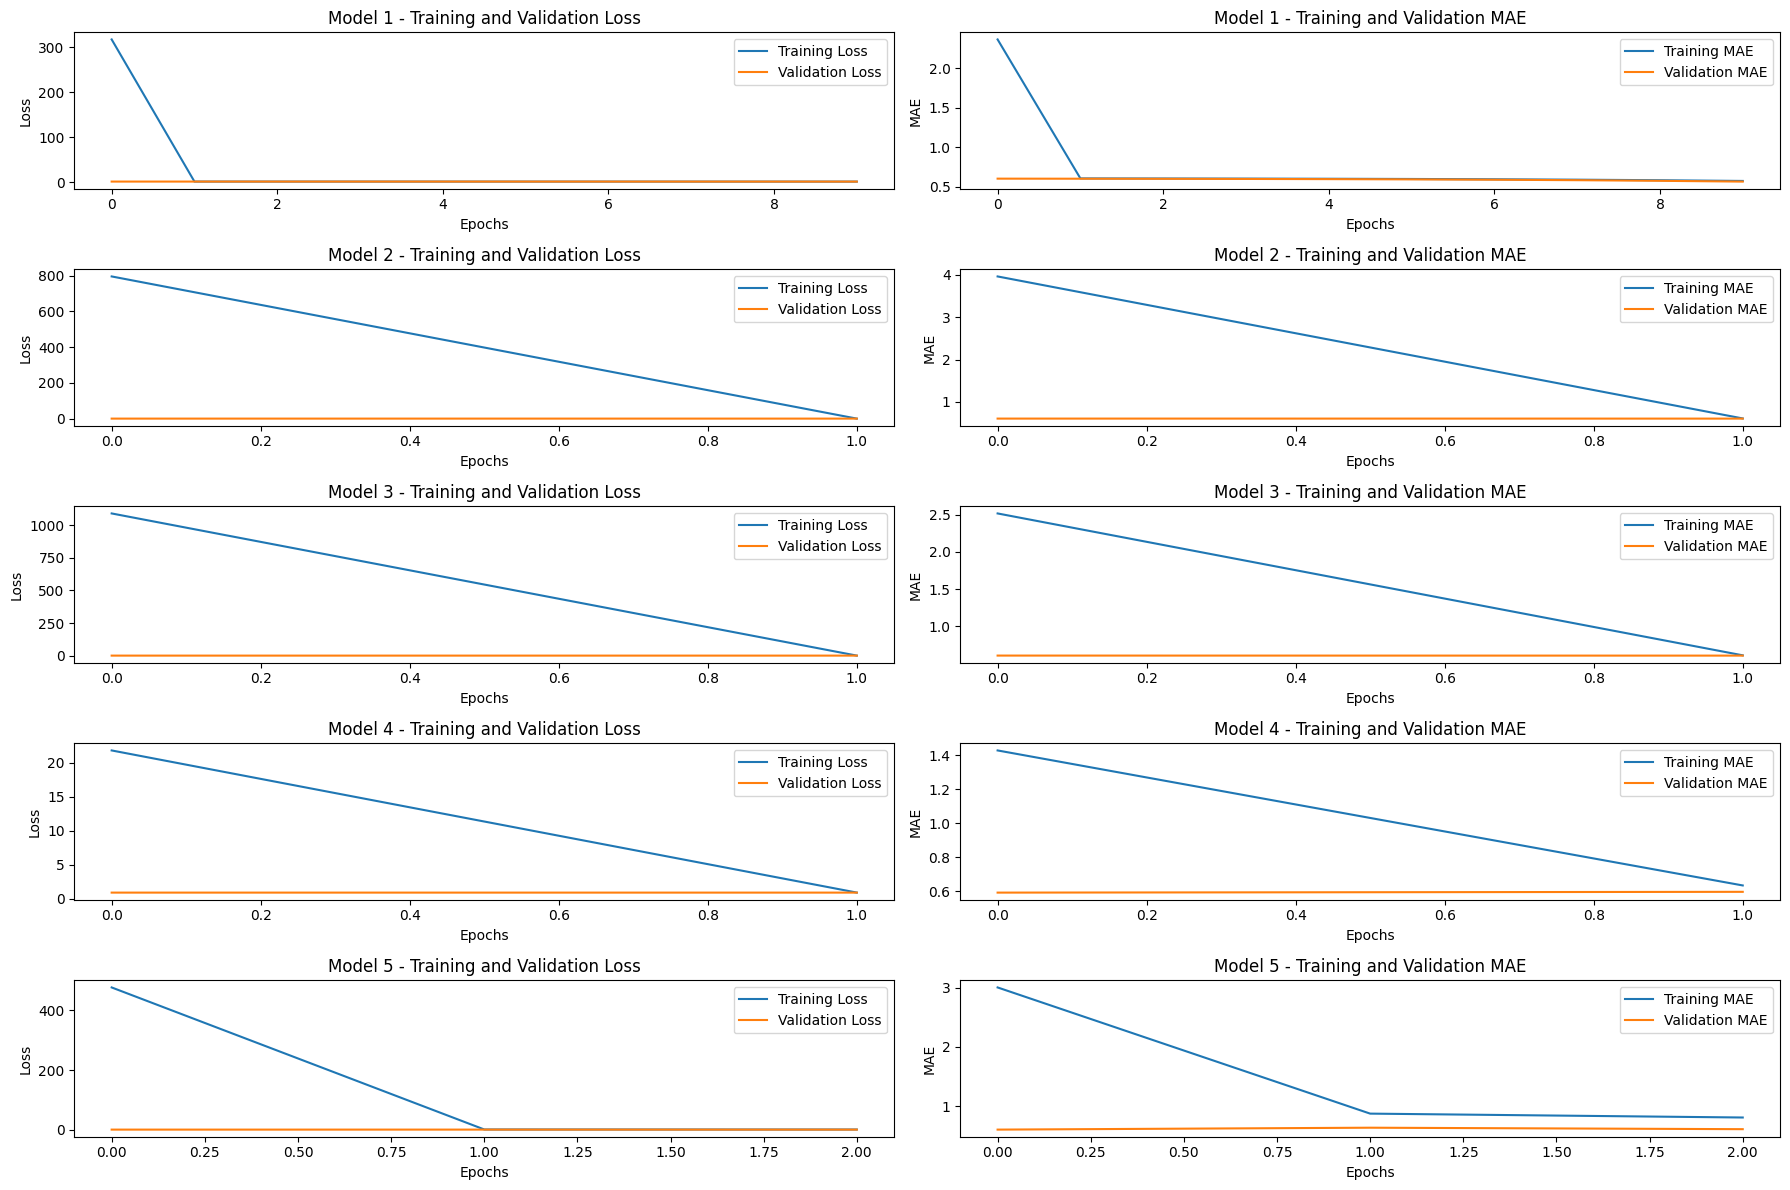

In [43]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history_rs in enumerate(histories_rs, start=1):
    plt.subplot(5, 2, i * 2 - 1)
    plt.plot(history_rs.history['loss'], label='Training Loss')
    plt.plot(history_rs.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(5, 2, i * 2)
    plt.plot(history_rs.history['mae'], label='Training MAE')
    plt.plot(history_rs.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title(f'Model {i} - Training and Validation MAE')
    plt.legend()

plt.tight_layout()
plt.show()

Second test - wish me luck

In [133]:
model_rs_4 = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(15, activation='relu'),
    Dense(1, activation='linear')
])

#model_murphy_exp = Sequential([
#    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
#    MaxPooling2D((2, 2)),
#    Dropout(0.2),
#    Conv2D(32, (3, 3), activation='relu'),
#    MaxPooling2D((2, 2)),
#    Dropout(0.2),
#    Conv2D(16, (3, 3), activation='relu'),
#    MaxPooling2D((2, 2)),
#    Dropout(0.2),
#    Flatten(),
#    Dense(15, activation='relu'),
#    Dense(1, activation='linear')
#])

#model_murphy_inv = Sequential([
#    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
#    MaxPooling2D((2, 2)),
#    Dropout(0.2),
#    Conv2D(32, (3, 3), activation='relu'),
#    MaxPooling2D((2, 2)),
#    Dropout(0.2),
#    Conv2D(16, (3, 3), activation='relu'),
#    MaxPooling2D((2, 2)),
#    Dropout(0.2),
#    Flatten(),
#    Dense(15, activation='relu'),
#    Dense(1, activation='linear')
#])

model_murphy_sqr = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(15, activation='relu'),
    Dense(1, activation='linear')
])

/Users/nataliamenacho/.pyenv/versions/3.10.6/envs/to_infinity_and_beyond/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
# Compile the models
models_murphy = [model_rs_4, model_murphy_sqr]
for i, model_murphy in enumerate(models_murphy, start=1):
    model_murphy.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['mae', 'mse','r2_score'])
    print(f"Model {i} compiled.")

Model 1 compiled.
Model 2 compiled.


In [135]:
from tensorflow.keras.callbacks import EarlyStopping
y = y_train_rs.astype(float)
# Define the EarlyStopping callback
es = EarlyStopping(patience=4, restore_best_weights = True)

# Placeholder for storing histories
histories_murph = []

history_murph_rs4 = model_rs_4.fit(X_train_rs,y_train_rs.astype(float),
                    batch_size=32,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[es])
histories_murph.append(history_murph_rs4)

#history_murph_exp = model_murphy_exp.fit(X_train_rs,np.exp(y),
#                    batch_size=32,
#                    epochs=100,
#                    validation_split=0.2,
#                    callbacks=[es])
#histories_murph.append(history_murph_exp)

#history_murph_inv = model_murphy_inv.fit(X_train_rs,np.divide(1,y),
#                    batch_size=32,
#                    epochs=100,
#                    validation_split=0.2,
#                    callbacks=[es])
#histories_murph.append(history_murph_inv)

history_murph_sqr = model_murphy_sqr.fit(X_train_rs,np.power(y,2),
                    batch_size=32,
                    epochs=100,
                    validation_split=0.2,
                    callbacks=[es])
histories_murph.append(history_murph_sqr)


Epoch 1/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 53s 154ms/step - loss: 0.6253 - mae: 0.4641 - mse: 0.6253 - r2_score: 0.0148 - val_loss: 0.4425 - val_mae: 0.3560 - val_mse: 0.4425 - val_r2_score: 0.2658
Epoch 2/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 49s 145ms/step - loss: 0.4121 - mae: 0.3614 - mse: 0.4121 - r2_score: 0.3020 - val_loss: 0.4158 - val_mae: 0.3434 - val_mse: 0.4158 - val_r2_score: 0.3101
Epoch 3/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 48s 144ms/step - loss: 0.3993 - mae: 0.3465 - mse: 0.3993 - r2_score: 0.3288 - val_loss: 0.4231 - val_mae: 0.3450 - val_mse: 0.4231 - val_r2_score: 0.2979
Epoch 4/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 50s 150ms/step - loss: 0.3865 - mae: 0.3322 - mse: 0.3865 - r2_score: 0.3490 - val_loss: 0.4341 - val_mae: 0.3644 - val_mse: 0.4341 - val_r2_score: 0.2797
Epoch 5/100
336/336 ━━━━━━━━━━━━━━━━━━━━ 48s 143ms/step - loss: 0.3476 - mae: 0.3256 - mse: 0.3476 - r2_score: 0.3755 - val_loss: 0.4140 - val_mae: 0.3393 - val_mse: 0.4140 - val_r2_score: 0.3131
Epoch 6/100
336/336 

In [136]:
y_pred_rs_4 = model_rs_4.predict(X_test_rs)
#y_pred_me = model_murphy_exp.predict(X_test_rs)
#y_pred_mi = model_murphy_inv.predict(X_test_rs)
y_pred_ms = model_murphy_sqr.predict(X_test_rs)
print(np.log(y_pred_rs_4))
#print(np.divide(1,y_pred_mi))
print(np.sqrt(y_pred_ms))

180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step
[[-0.5774206 ]
 [-0.6353012 ]
 [-1.0329722 ]
 ...
 [-0.40893418]
 [-0.48068026]
 [-1.703216  ]]
[[0.7983506 ]
 [0.60586864]
 [0.5488265 ]
 ...
 [0.71984494]
 [0.7454944 ]
 [0.68001866]]


/var/folders/sk/0kkkyp9d6wgg4963704w0y4m0000gn/T/ipykernel_69086/3576093549.py:7: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(y_pred_ms))


In [137]:
from sklearn.metrics import r2_score
#murphy_e_r2 = r2_score(y_test_rs, np.log(np.maximum(y_pred_me, 0.000001)))
murphy_rs4_r2 = r2_score(y_test_rs, y_pred_rs_4)
murphy_s_r2 = r2_score(y_test_rs, np.sqrt(np.maximum(y_pred_ms, 0)))
print(murphy_rs4_r2)
print(murphy_s_r2)

0.35908979177474976
0.06377160549163818


In [119]:
y_test_rs

array(['-9.916831E-05', '0.4815928', '0.3270495', ..., '0.4920845',
       '0.5683526', '0.2671908'], dtype='<U13')

In [120]:
np.log(np.abs(y_pred_me))

array([[1.7514879 ],
       [1.3689201 ],
       [0.90940386],
       ...,
       [1.5462868 ],
       [1.0595715 ],
       [0.5227771 ]], dtype=float32)

In [78]:
#print(np.log(y_pred_me))

[[ 1.1564723 ]
 [ 0.17869943]
 [-1.0401036 ]
 ...
 [-0.1613051 ]
 [-1.0401036 ]
 [-1.0401036 ]]


In [79]:
#y_test_rs

array(['-9.916831E-05', '0.4815928', '0.3270495', ..., '0.4920845',
       '0.5683526', '0.2671908'], dtype='<U13')

ValueError: num must be an integer with 1 <= num <= 10, not 12

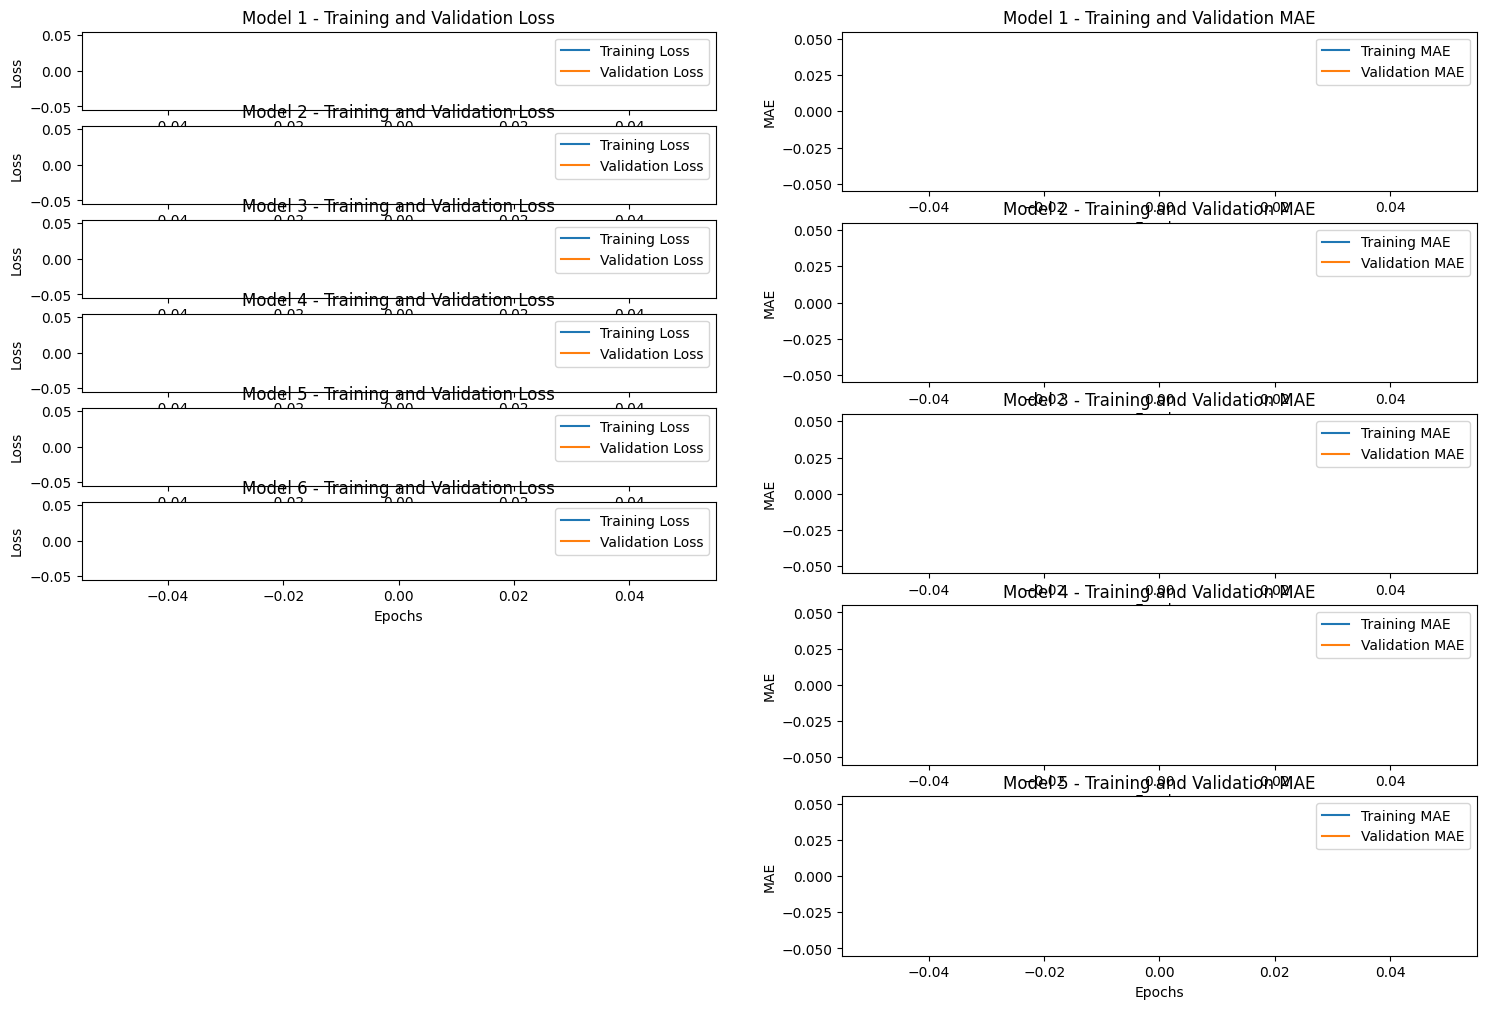

In [ ]:
# Plot the training and validation loss and accuracy for all models
plt.figure(figsize=(18, 12))

for i, history_murph in enumerate(histories_murph, start=1):
    plt.subplot(10, 2, i * 2 - 1)
    plt.plot(history_murph.history['loss'], label='Training Loss')
    plt.plot(history_murph.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Model {i} - Training and Validation Loss')
    plt.legend()

    plt.subplot(5, 2, i * 2)
    plt.plot(history_murph.history['mae'], label='Training MAE')
    plt.plot(history_murph.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.title(f'Model {i} - Training and Validation MAE')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model_murphy_1.save('../models/model.murphy.1.h5')